#### Importation des librairies

In [4]:
import pandas as pd
import numpy as np
%pylab inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import warnings; warnings.simplefilter('ignore')

Populating the interactive namespace from numpy and matplotlib


#### Données brutes

In [5]:
df_raw = pd.read_csv('../input/housing.csv')

#### Infos sur les données

In [6]:
df_raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# Recherches des valeurs nulles
df_raw.info()       # les données sont complètes. pas de valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#données manquantes ou valeurs nulles
pd.isnull(df_raw).sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

 ##### info sur la variable 'Ocean_proximity' qui est une valeur qualitative
 Il faut regarder ce qu'elle contient

In [9]:
df_raw['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
# taille du data frame
df_raw.shape

(20640, 10)

##### Visualisation de la variable ocean_proximity

In [11]:
ocean_proximity_dummies_houses  = pd.get_dummies(df_raw['ocean_proximity'])
ocean_proximity_dummies_houses.columns = ['<1H OCEAN','INLAND','NEAR OCEAN','NEAR BAY','ISLAND']

In [12]:
ocean_proximity_dummies_houses.head()

,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [13]:
# On élimine la variable 'ocean_proximity'
df_raw.drop(['ocean_proximity'],axis=1,inplace=True)

In [14]:
# On remplace la variable 'ocean_proximity' par ses sous-variables obtenues par dummification
df_raw = df_raw.join(ocean_proximity_dummies_houses)

In [15]:
# On visualise le nouveau tableau 
df_raw.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,0,1,0,0,0


### Normalisation des coordonnées polaires

In [16]:
# package permettant de normaliser les variables (voir à la fin)
from sklearn.preprocessing import MinMaxScaler

### Revenu median
##### Le revenu median étant une valeur importante, on va la catégoriser

In [17]:
df_raw['income_cat']=np.ceil(df_raw['median_income'] /1.5)
df_raw['income_cat'].where(df_raw['income_cat'] < 5, 5.0 , inplace = True)

Text(0, 0.5, 'montant')

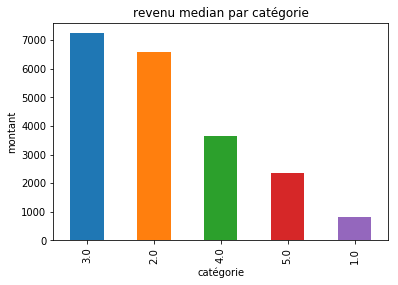

In [18]:
# diagramme en battons pour le revenu median
df_raw['income_cat'].value_counts().plot(kind='bar')
plt.title('revenu median par catégorie')
plt.xlabel('catégorie')
plt.ylabel('montant')

### Echantillonage stratifié sur les tranches de revenus

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)

In [21]:
for train_index, test_index in split.split(df_raw,df_raw['income_cat']):
    strat_train_set = df_raw.loc[train_index]  # L'indexeur de locus Pandas peut être utilisé avec DataFrames pour deux 
                                          # cas d'utilisation différents:
                                          # a.) Sélection des lignes par étiquette / index
                                          # b.) Sélection de lignes avec une recherche booléenne / conditionnelle
    strat_test_set =df_raw.loc[test_index]

In [22]:
housing = strat_train_set.copy()

In [23]:
# On élimine la variable 'median_income'
housing.drop(['income_cat'],axis=1,inplace=True)

In [24]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,1,0,0,0,0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,1,0,0,0,0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,0,0,0,0,1
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,0,1,0,0,0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,1,0,0,0,0


### Visualisation des données en fonction des coordonnées géographiques

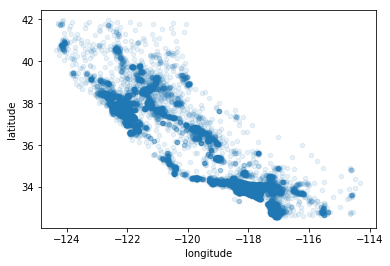

In [25]:
df_raw.plot(kind='scatter', x='longitude',y='latitude', alpha = 0.1)
# on ajoute alpha= 0,1 pour distinguer les points de plus forte densité de population

##### On y ajoute les prix de l'immobilier

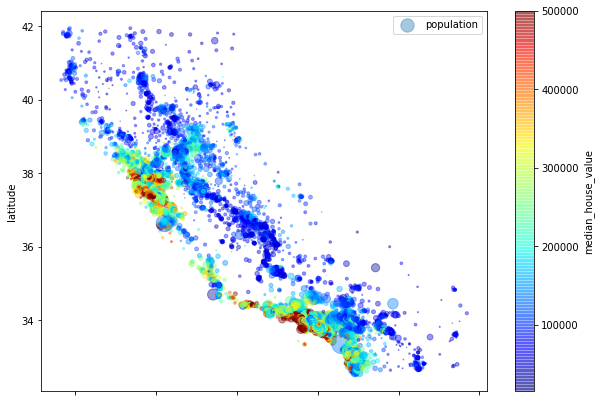

In [26]:
df_raw.plot(kind='scatter', x='longitude',y='latitude', alpha = 0.4,
             s=df_raw['population']/100, label='population', figsize=(10,7),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar = True,)
plt.legend()

## recherche des corrélations

In [27]:
import seaborn as sns
sns.set_style('whitegrid')

##### On visualise toutes les corrélations

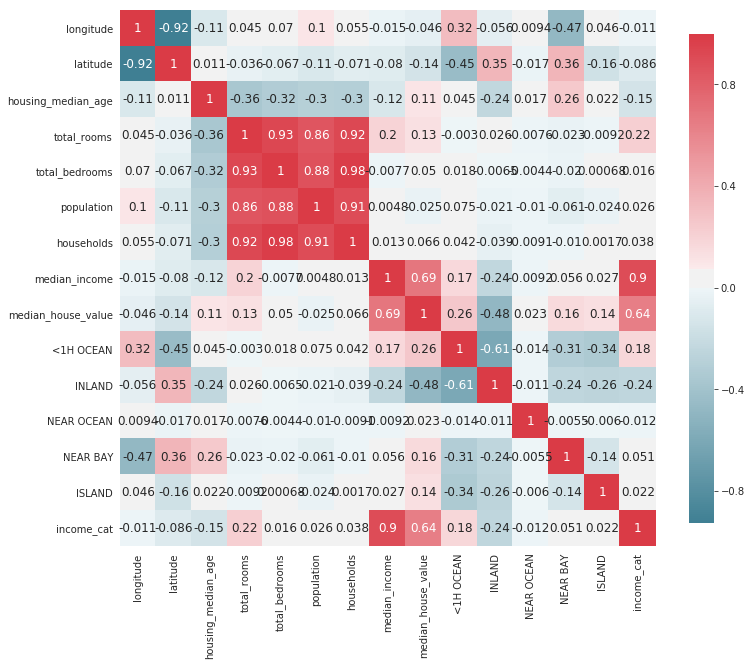

In [28]:
# Matrice couleur des données
def plot_correlation_map( df_raw ):
    corr = df_raw.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(df_raw)

##### Corrélation avec la valeur des maisons

In [29]:
corr_matrix = df_raw.corr()

In [30]:
corr_matrix['median_house_value'].sort_values(ascending=False)
# Corrélation positive forte => les prix augmentent. négative => les prix diminuent. proche de zéro = pas de corr
# UNIQUEMENT POUR LES CORRELATIONS LINEAIRES

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
<1H OCEAN             0.256617
NEAR BAY              0.160284
ISLAND                0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
NEAR OCEAN            0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

## Création de nouvelles variables

In [31]:
# Nombre de chambres par appartement:
df_raw['room_per_households']=df_raw['total_rooms']/df_raw['households']
df_raw['bedrooms_per_room']=df_raw['total_bedrooms']/df_raw['total_rooms']
df_raw['population_per_house']=df_raw['population']/df_raw['households']

#### Nouvelle matrice de corrélations

In [32]:
corr_matrix = df_raw.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.688075
income_cat              0.643892
<1H OCEAN               0.256617
NEAR BAY                0.160284
room_per_households     0.151948
ISLAND                  0.141862
total_rooms             0.134153
housing_median_age      0.105623
households              0.065843
total_bedrooms          0.049686
NEAR OCEAN              0.023416
population_per_house   -0.023737
population             -0.024650
longitude              -0.045967
latitude               -0.144160
bedrooms_per_room      -0.255880
INLAND                 -0.484859
Name: median_house_value, dtype: float64

In [33]:
df_raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND,income_cat,room_per_households,bedrooms_per_room,population_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,5.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,5.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,5.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,4.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,3.0,6.281853,0.172096,2.181467


## Nettoyage des données

### Valeurs manquantes 'total_bedrooms'

In [34]:
#données manquantes 
pd.isnull(df_raw).sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms          207
population                0
households                0
median_income             0
median_house_value        0
<1H OCEAN                 0
INLAND                    0
NEAR OCEAN                0
NEAR BAY                  0
ISLAND                    0
income_cat                0
room_per_households       0
bedrooms_per_room       207
population_per_house      0
dtype: int64

In [35]:
# On remplace les valeurs manquantes par la médiane
df_raw["total_bedrooms"].fillna(df_raw["total_bedrooms"].median(), inplace=True)
# convert from float to int
df_raw['total_bedrooms'] = df_raw['total_bedrooms'].astype(int)

In [36]:
# On remplace les valeurs manquantes par la médiane
df_raw["bedrooms_per_room"].fillna(df_raw["bedrooms_per_room"].median(), inplace=True)
# convert from float to int
df_raw['bedrooms_per_room'] = df_raw['bedrooms_per_room'].astype(int)

###### Normalisation des variables 
pour faciliter le travail des algorithmes

In [37]:
# normalisation de certaines variables
df_raw['longitude'] = MinMaxScaler().fit_transform(df_raw['longitude'].values.reshape(-1, 1))
df_raw['latitude'] = MinMaxScaler().fit_transform(df_raw['latitude'].values.reshape(-1, 1))   
df_raw['total_rooms'] = MinMaxScaler().fit_transform(df_raw['total_rooms'].values.reshape(-1, 1))   
df_raw['population'] = MinMaxScaler().fit_transform(df_raw['population'].values.reshape(-1, 1))   
df_raw['households'] = MinMaxScaler().fit_transform(df_raw['households'].values.reshape(-1, 1))   
df_raw['total_bedrooms'] = MinMaxScaler().fit_transform(df_raw['total_bedrooms'].values.reshape(-1, 1)) 
df_raw['median_house_value'] = (df_raw['median_house_value']/100).astype(int)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [38]:
df_raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND,income_cat,room_per_households,bedrooms_per_room,population_per_house
0,0.211155,0.567481,41.0,0.022331,0.019863,0.008941,0.020556,8.3252,4526,0,0,0,1,0,5.0,6.984127,0,2.555556
1,0.212151,0.565356,21.0,0.180503,0.171477,0.067210,0.186976,8.3014,3585,0,0,0,1,0,5.0,6.238137,0,2.109842
2,0.210159,0.564293,52.0,0.037260,0.029330,0.013818,0.028943,7.2574,3521,0,0,0,1,0,5.0,8.288136,0,2.802260
3,0.209163,0.564293,52.0,0.032352,0.036313,0.015555,0.035849,5.6431,3413,0,0,0,1,0,4.0,5.817352,0,2.547945
4,0.209163,0.564293,52.0,0.041330,0.043296,0.015752,0.042427,3.8462,3422,0,0,0,1,0,3.0,6.281853,0,2.181467


 #### Les données sont prêtes. On va pouvoir entrainer le modèle

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# définition de la variable 'cols' (plus facile pour manipuler toutes les colonnes)
cols = ['longitude', 
        'latitude',
        'housing_median_age',
        'total_rooms',
        'total_bedrooms',
        'population',
        'households',
        'median_income',
        'median_house_value',
        '<1H OCEAN',
        'INLAND',
        'NEAR OCEAN',
        'NEAR BAY',
        'ISLAND',
        'room_per_households',
        'bedrooms_per_room',
        'population_per_house'
       ] 

In [42]:
# X représente les colonnes
X = df_raw[cols]

In [43]:
# y représente la colonne 'median_house_value'. 
# On élimine 'median_house_value' de X
y = X['median_house_value']
del X['median_house_value']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.svm import SVR              # Pour des valeurs continues en cible on va utiliser SVR
svr = SVR()
svr.fit(X_train, y_train)
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

0.15768443886282602
0.1591312747172996


In [46]:
def parse_model_0(X):
    target = X.median_house_value
    X=X[cols] #(Valeurs ayant des données complètes)😊
    return X, target

In [47]:
X,y = parse_model_0(df_raw.copy())

In [48]:
from sklearn.model_selection import cross_val_score
def compute_score(clf, X, y):
    xval = cross_val_score(clf, X, y, cv = 5)
    return mean(xval) 